<a href="https://colab.research.google.com/github/kayeekim/kayeekim.github.io/blob/master/_code_practice/%EC%8B%A4%EB%AC%B4%EC%97%90_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_12_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 실무에 활용하는 머신러닝

http://www.kocw.net/home/cview.do?mty=p&kemId=1380150

## 선형회귀 알고리즘 활용 실습
### Scikit-learn 활용

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## 강의 데이터 대신 새로 데이터 생성하여 사용
X = np.linspace(0, 30, 30)
Y = X + np.random.randn(*X.shape)
print(X, Y)

df = pd.DataFrame(X, columns=['height'])
df['weight'] = Y
display(df.head())

[ 0.          1.03448276  2.06896552  3.10344828  4.13793103  5.17241379
  6.20689655  7.24137931  8.27586207  9.31034483 10.34482759 11.37931034
 12.4137931  13.44827586 14.48275862 15.51724138 16.55172414 17.5862069
 18.62068966 19.65517241 20.68965517 21.72413793 22.75862069 23.79310345
 24.82758621 25.86206897 26.89655172 27.93103448 28.96551724 30.        ] [ 1.16855875  2.14708915  1.44320664  3.30218899  3.03899299  5.48658078
  6.0958411   8.32711795  7.33826561  9.79926549  9.47016024 11.02807415
 12.28617505 14.49998834 15.96339288 13.96508028 15.82640244 19.22709943
 17.39462392 17.45525921 20.15352163 21.55571696 24.52674426 22.32429094
 23.7973925  25.66744896 26.26521699 28.10599742 29.83567613 29.74096635]


,height,weight
0,0.000000,1.168559
1,1.034483,2.147089
2,2.068966,1.443207
3,3.103448,3.302189
4,4.137931,3.038993


[0.98166303]
0.18293237081992508


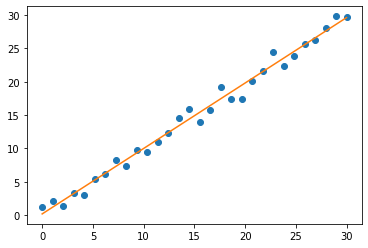

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


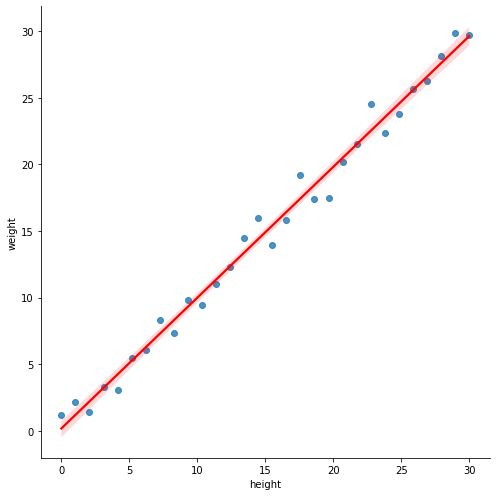

In [3]:
# Scikit-learn을 활용한 linear regression 모델 구현
#from sklearn.linear_model import LinearRegression
X = df['height']
Y = df['weight']

lr = LinearRegression()
lr.fit(X.values.reshape(-1,1), Y)

print(lr.coef_)
print(lr.intercept_)

# 시각화 - matplotlib
plt.plot(X, Y, 'o')
plt.plot(X, lr.predict(X.values.reshape(-1,1)))
plt.show()

# 시각화 - seaborn
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)

sns.lmplot(x='height', y='weight', data=df,
           size=7, line_kws={'color':'red'})

### Keras로 LR 실습하기

In [4]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## 데이터 생성
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)
print(X, Y)

df = pd.DataFrame(X, columns=['height'])
df['weight'] = Y
display(df.head())

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ] [-1.18291003 -0.74278844  1.92504892  2.83653093  4.10379776  5.28711769
  5.92335709  7.93134302  8.6763387  11.53412317]


,height,weight
0,0.000000,-1.182910
1,1.111111,-0.742788
2,2.222222,1.925049
3,3.333333,2.836531
4,4.444444,4.103798


In [6]:
# Keras로 LR 모델 구현하기
#from tensorflow.keras import optimizers
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
# 컴파일된 모델 확인

weights = model.layers[0].get_weights()
w = weights[0][0]

print('initial w is : ' + str(w))

initial w is : [-1.3598855]


In [8]:
# 컴파일된 모델을 데이터로 학습시키기
model.fit(X, Y, batch_size=30, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 492ms/step - loss: 197.8717
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 18.1303
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 2.3506
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9652
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8436
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8329
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.8320
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8319
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.8319
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.8319


In [9]:
# 학습된 모델 확인
weights = model.layers[0].get_weights()
w = weights[0][0]

print('trained w is : ' + str(w))

trained w is : [1.006551]


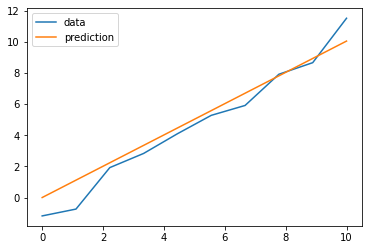

In [10]:
# 시각화 - matplotlib
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label='prediction')
plt.legend()
plt.show()